<a href="https://colab.research.google.com/github/sgr1118/deep-learning-from-scratch-3/blob/main/%EC%A0%9C3%EA%B3%A0%EC%A7%80_%EA%B3%A0%EC%B0%A8_%EB%AF%B8%EB%B6%84_%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 고차 미분 수행하기

## 고차 미분이란
- 1 ~ n차 미분을 반복하는 작업이다. 현대적인 딥러닝 프레임워크들은 이 기능을 자동으로 계산한다.

In [2]:
cd '/content/drive/MyDrive/Book/deeplearng_basic_3/'

/content/drive/MyDrive/Book/deeplearng_basic_3


## 25단계: 계산 그래프 시각화(1)
- 이 단계는 복잡한 식을 계산하는 계산 그래프를 시각화한다.

### 25.1 Graphviz 설치하기
- Graphviz는 그래프를 시각화하는 도구이다.

In [ ]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!dot -V

dot - graphviz version 2.43.0 (0)


### 25.2 DOT 언어로 그래프 작성하기

In [ ]:
digraph g{
    x
    y
}

In [ ]:
!dot sample.dot -T png -o sample.png

Error: dot: can't open sample.dot


In [ ]:
from graphviz import Source
from graphviz import Digraph

In [ ]:
import os
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

### 25.3 노드에 속성 지정하기

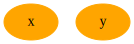

In [ ]:
dot = Digraph()

dot.node('x', color = 'orange', style = 'filled')
dot.node('y', color = 'orange', style = 'filled')

dot

### 25.4 노드 연결하기

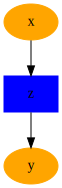

In [ ]:
dot = Digraph()

dot.node('x', color = 'orange', style = 'filled')
dot.node('y', color = 'orange', style = 'filled')
dot.node('z', color = 'blue', style = 'filled', shape = 'box')

dot.edges(['xz', 'zy'])
# dot.edge('y', 'z', constraint='false')

dot

## 26단계: 계산 그래프 시각화(2)
- 계산 그래프를 DOT 언어로 변환

### 26.2 계산 그래프에서 DOT 언어로 변환하기
- _dot_var라는 보조함수를 먼저 구현한다. 이름 앞에 밑줄을 사용한 이유는 get_dot_graph 함수 전용으로 사용할 것이기 때문이다.

In [ ]:
# 추가 코드
def _dot_var(v, verbose = False): # DOT 언어로 작성된 문자열 반환
    dot_var = '{} [label = "{}", color = orange, style= filled]\n'

    name = '' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name += ': '
        name += str(v.shape) + ' ' + str(v.dtype)
    return dot_var.format(id(v), name)

In [ ]:
!python steps/step26.py

139888300654544 [label = "x", color = orange, style= filled]

139888300654544 [label = "x: (2, 3) float64", color = orange, style= filled]



In [ ]:
# 추가 코드
def _dot_func(f): # DeZero를 DOT 언어로 기술한다.
    dot_func = '{} [label = "{}", color = lightblue, style= filled, shape = box]\n'
    txt = dot_func.format(id(f), f.__class__.__name__)

    dot_edge = '{} -> {}\n'
    for x in f.inputs:
        txt += dot_edge.format(id(x), id(f))
    for y in f.outputs:
        txt += dot_edge.format(id(f), id(y())) # y는 약한 참조
    return txt

In [ ]:
!python steps/step26.py

140422137702832 [label = "Add", color = lightblue, style= filled, shape = box]
140422137708496 -> 140422137702832
140422137702352 -> 140422137702832
140422137702832 -> 140422137703696



In [ ]:
# 추가 코드
# DOT 언어로 기술한 문자열을 txt에 추가한다.
def get_dot_graph(output, verbose = True):
    txt = ''
    funcs = []
    seen_set = set()

    def add_func(f):
        if f not in seen_set:
            funcs.append(f)
            # funcs.sort(key = lambda x: x.generation)
            seen_set.add(f)
    
    add_func(output.creator)
    txt += _dot_var(output, verbose)

    while funcs:
        func = funcs.pop()
        txt += _dot_func(func)
        for x in func.inputs:
            txt += _dot_var(x, verbose)

            if x.creator is not None:
                add_func(x.creator)
    
    return 'digraph g {\n' + txt + '}'

### 26.3 이미지 변환까지 한 번에
- DOT 언어를 이미지로 변환하기 위해 dot 명령 실행까지 한 번에 해주는 함수를 사용한다.

In [ ]:
# 추가 코드
import os
import subprocess

def plot_dot_graph(output, verbose = True, to_file = 'graph.png'):
    dot_graph = get_dot_graph(output, verbose)

    # dot 데이터를 파일에 저장
    tmp_dir = os.path.join(os.path.expanduser('~'), 'dezero')
    if not os.path.exists(tmp_dir): # ~/.dezero 디렉터리가 없다면 생성
        os.mkdir(tmp_dir)
    graph_path = os.path.join(tmp_dir, 'tmp_graph.dot')

    with open(graph_path, 'w') as f:
        f.write(dot_graph)

    # dot 명령 호출
    extension = os.path.splitext(to_file)[1][1:] # 확장자(png, pdf 등)
    cmd = 'dot {} -T {} -o {}'.format(graph_path, extension, to_file)
    subprocess.run(cmd, shell = True)

In [ ]:
!python steps/step26.py # 이미지 생성 완료!

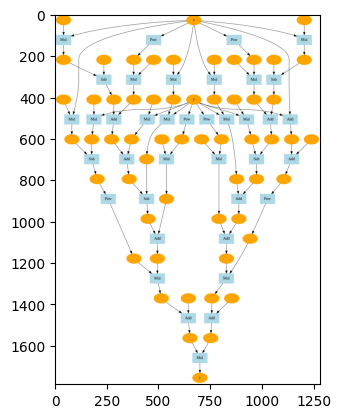

In [ ]:
# 이미지 열어보기

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('goldstein.png')
imgplot = plt.imshow(img)
plt.show()

## 27단계: 테일러 급수 미분
- sin 함수의 미분을 구현한다.

### 27.1 sin 함구 구현
- sin의 미분 값은 cos이다.

In [ ]:
# 추가 코드

import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
    return Sin()(x)

In [ ]:
!python steps/step27.py 

0.7071064695751781
2.5533807987072743


### 27.2 테일러 급수 이론
- 이제 sin 함수의 미분을 다른 방법으로 계산하려한다. 바로 테일러 급수이다. 테일러 급수란 어떤 함수를 다항식으로 근사하는 방법이다. 아래는 수식

- $f(x) = f(a) + f^{'}(a)(x-a)+\frac{1}{2!}f^{"}(a)(x-a)^2+\dots$

- 여기에서 a는 $f(x)$의 테일러 급수이고 a는 임의의 값이다.
- 위 식처럼 n차 미분방식으로 항이 무한히 계속되지만, 어느 시점에서 중단하면 $f(x)$의 값을 근사할 수 있다. 항이 많아질수록 근사의 정확도가 높아진다.
- 한편 $a = 0$일 때의 테일러 급수는 매클로린 전개라고한다.
- $f(x) = sin(x)$를 식에 적용하면 아래와 같은 공식이 생긴다.
- $sin(x) = \sum_{i = 0}^{\infty}(-1)^{i}\frac{x^{2i+1}}{(2i+1)!}$
- i가 커질수록 근사 정밀도가 좋아지고 위 수식의 절댓값은 작아지므로 i의 값을 적절히 결정할 수 있다.

### 27.3 테일러 급수 구현
- 파이썬의 math 모듈에 있는 math.factorial 함수를 사용한다.

In [ ]:
# 추가 코드
import math

def my_sin(x, threshold = 0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i +1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

In [ ]:
!python steps/step27.py # core_simple.py 오타 수정

0.7071064695751781
0.7071032148228457


### 27.4 계산 그래프 시각화


In [ ]:
!python steps/step27.py

0.7071064695751781
0.7071032148228457


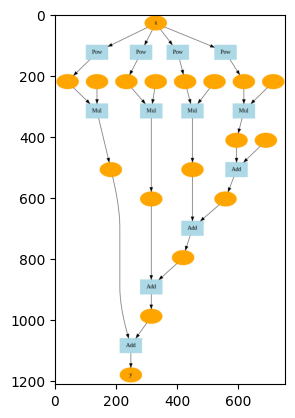

In [ ]:
# 이미지 열어보기

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('my_sin.png')
imgplot = plt.imshow(img)
plt.show()

## 28단계: 함수 최적화
- 구체적인 함수를 대상으로 최적화를 수행
- 최적화란 어떤 함수가 주어졌을 때 그 최솟값(또는 최댓값)을 반환하는 입력(함수의 인수)을 찾는 일이다.

### 28.1 로젠브룩 함수
- 로젠브룩 함수의 수식은 아래와 같다.
- $y = 100(x_1-x_{0}^2)^2 + (1 - x_{0})^2$

![](https://blog.kakaocdn.net/dn/cyG7eM/btrhqfhaoOA/1mlT45KN9zaDIxY6mkKkeK/img.png)
<center>로젠브룩 함수의 형태</center>

- 이 형태를 보면 포물선 모양으로 길게 뻗은 골짜기가 보인다. 이번 단계의 목표는 함수의 출력이 최소가 되는 $x_0$, $x_1$을 찾는 것이다.

### 28.2 미분 계산하기
- x0, x1의 두 미분값은 (-2.0, 400.0) 벡터를 기울기 또는 기울기 벡터라고한다. 기울기는 각 지점에서 함수의 출력을 가장 크게하는 방향을 가리킨다. 반대로 여기에 마이너스를 곱하면 y값을 가장 작게 줄여주는 방향을 뜻한다.

In [ ]:
!python steps/step28.py

# -2.0, 400.0

-2.0 400.0


### 28.3 경사하강법 구현
- 함수가 복잡할수록 기울기가 가리키는 방향이 반드시 최댓값(최솟값)이 존재한다고 볼 수 없다. 그렇기 때문에 경사하강법을 사용하는 것이다.

In [ ]:
!python steps/step28.py

## 29단계: 뉴턴 방법으로 푸는 최적화
- 전 단계에서 로벤프북 함수의 최솟값을 경사하강법으로 구했다. 다만 경사하강법은 일반적으로 수렴이 느리다는 단점이 있다. 이런 단점을 보완하고자 뉴턴 방법을 사용할 수 있다.

### 29.1 뉴탄 방법을 활용한 최적화 이론
- $x <- x-\alpha f^{'}(x)$
- $x <- x-\frac{f^{'}(x)}{f^{"}(x)}$
- 첫 번째 수식은 경사하강법이고 두 번째 수식은 뉴턴 방법이다. 차이점은 경사하강법은 $\alpha$라는 계수를 연구자가 수동으로 설정한다. 이에 반해 뉴턴 방법은 2차 미분을 이용하요 경사하강법에서 말하는 $\alpha$를 자동으로 조정한다.

### 29.2 뉴턴 방법을 활용한 최적화 구현
- 아직 DeZero는 2차 미분을 하지 못하기 때문에 수동으로 2차 미분을 구해준다.

In [ ]:
# 추가 코드

if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

import numpy as np
from dezero import Function, Variable

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

def gx2(x):
    return 12 * x ** 2 - 4

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward()

    x.data -= x.grad / gx2(x.data)

In [ ]:
!python steps/step29.py

# 뉴턴 방법으로 구한 최솟값은 1이다.

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


## 30단계: 고차 미분 (준비편)
- 현재 DeZero는 미분을 자동으로 계산하지만 1차 미분에 한에서 기능을 수행한다. 어떤 형태의 고차미분까지 자동으로 계산하도록 DeZero의 확장이 필요하다.

- 이 단계에서는 Variable 순전파, 역전파, Fuction의 계산 방식을 다시 확인하는 과정이다. 교재를 한번 다시 읽어보면서 이해하고 넘어가자 

## 31단계 : 고차 미분 (이론편)
- 이전 단계에서는 현재의 DeZero 구현을 알아봤고 요점은 다음과 같다,
- 계산의 '연결'은 Function 클래스의 __call__ 메서드에서 만들어진다.
- 구체적인 순전파와 역적파 계산은 Function 클래스를 상속한 클래스의 forward 메서드와 backward 메서드로 처리한다.

## 32단계 : 고차 미분 (구현 편)
- 이번 단계에서는 DeZero의 고차 미분을 코드로 구현한다. core_simple에서 이제 core.py로 바꿔 새롭게 구현할 것이다.

### 32.1 새로운 DeZero
- 기존 Variable 클래스를 변경한다.

In [ ]:
# 변경코드
class Variable:

    def backward(self, retain_grad = False): # retain_grad = False는 중간 변수 미분값을 모두 None으로 설정
            if self.grad is None:
                #self.grad = np.ones_like(self.data) # self.data와 형상과 데이터 터입이 같은 ndarray 인스턴스 생성
                self.grad = Variable(np.ones_like(self.data))

### 32.2 함수 클래스의 역전파
- Add, Mul, Neg, Sub, Div, Pow 함수를 수정하도록 한다.

In [ ]:
# 변경 코드

class Mul(Function):
    def forward(self, x0, x1):
        y = x0 * x1
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        return gy * x1, gy * x0 # 오타 수정

def mul(x0, x1):
    x1 = as_array(x1) # ndarray 인스턴스로 변환
    return Mul()(x0, x1)

### 32.3 역전파를 더 효율적으로 (모드 추가)
- 역전파를 처음 한 번 이우로 다시 할 일이 없다면 역전파 계산도 '역전파 비활성화 모드'로 실행하도록 만든다.

In [ ]:
def backward(self, retain_grad = False, create_graph = False): # retain_grad = False는 중간 변수 미분값을 모두 None으로 설정

    while funcs:
            f = funcs.pop() # 1. 함수를 가져온다.
            gys = [output().grad for output in f.outputs] # 약한 참조를 적용하고 출력 변수(미분값)을 리스트에 담는다.
            
            with using_config('enable_backprop', create_graph):
                gxs = f.backward(*gys) # 메인 backward
                if not isinstance(gxs, tuple): # 튜플이 아닌 경우 튜플로 변경
                    gxs = (gxs, )
                for x, gx in zip(f.inputs, gxs): # 모든 Variable 인스턴스 각각에 알맞은 미분값을 설정
                    if x.grad is None:
                        x.grad = gx
                    else:
                        x.grad = x.grad + gx # 미분값을 더해준다.

                    if x.creator is not None:
                        add_func(x.creator)

            if not retain_grad:
                for y in f.outputs:
                    y().grad = None # y는 약한 참조, 각 함수의 출력 변수의 미분값을 
                    # 유지하지 않도록 설정

### 32.4 __init__.py 변경
- 새로운 DeZero를 사용하기 때문에 is_simple_core = False로 __init__.py를 수정해준다.

## 33단계 : 뉴턴 방법으로 푸트 최적화(자동 계산)

### 33.1 2차 미분 계산하기
- 이 미분 계산값은 2차 미분 결과값이 제대로 나오지 않고있다. 왜냐하면 Variable에 미분값이 남아 있는 상태에서 새로운 역전파를 수행했기 때문이다. 이 문제를 해결하기 위해 새로운 계산을 하기 전에 Variable의 미분값을 재설정하여야한다.

In [ ]:
!python steps/step33.py

variable(24.0)
variable(68.0)


In [ ]:
# 미분값 재설정이 들어간 코드 시행
!python steps/step33.py

variable(24.0)
variable(44.0)


### 33.2 뉴턴 방법을 활용한 최적화
- 뉴턴 방법을 활용한 최적화의 수식을 다시보면 함수 $f(x)$의 1차 미분과 2차 미분을 사용하여 $x$를 갱신하고 있다. 이 계산을 DeZero를 사용하여 자동으로 수행되도록 한다.


In [4]:
!python steps/step33.py

# 7회만에 최적 최솟값에 도달하였따.

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


## 34단계 : sin 함수 고차 미분

### 34.1 sin 함수 구현

In [ ]:
# functions.py 구현 코드

import numpy as np
from dezero.core import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x, = self.inputs
        gx = gy * cos(x) # DeZero의 cos 함수
        return gx

def sin(x):
    return Sin()(x)

### 34.2 cos 함수 구현

In [ ]:
# functions.py 구현 코드

class Cos(Function):
    def forward(self, x):
        y = np.cos(x)
        return y

    def backward(self, gy):
        x, = self.inputs
        gx = gy * -sin(x)
        return gx

def cos(x):
    return Cos()(x)

### 34.3 sin 함수 고차 미분

In [ ]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph = True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph = True)
    print(x.grad) # n차 미분

In [6]:
!python steps/step34.py

variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


<function matplotlib.pyplot.show(close=None, block=None)>

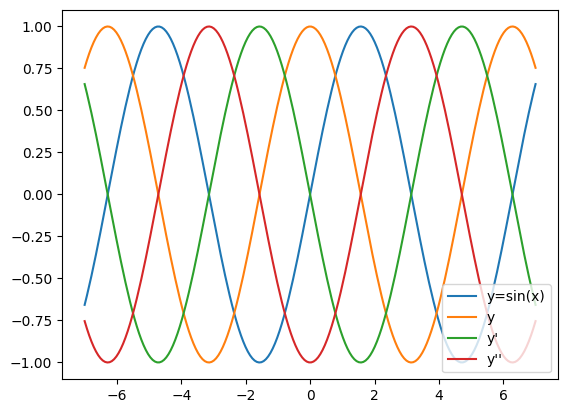

In [11]:
# 앞 예시에서 코드 확장

import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

x = Variable(np.linspace(-7, 7, 200)) # -7부터 7까지 균일하게 200등분한 1차원 배열
y = F.sin(x)
y.backward(create_graph = True)

logs = [y.data]

for i in range(3):
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph = True)

# 그래프 그리기
labels = ['y=sin(x)', 'y', "y'", "y''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label = labels[i])
plt.legend(loc = 'lower right')
plt.show

In [12]:
!python steps/step34.py

## 35단계 : 고차 미분 계산 그래프
- 이번 단계에서는 tanh 함수를 추가로 구현한다.
- $y = tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

### 35.1 tanh 함수 미분
- $\frac{\partial tanh(x)}{\partial x} = 1-y^2$
- 위 식은 전개과정에서 결과만을 나타낸 것이고 자세한 수식은 교재를 참고

### 35.2 tanh 함수 구현

In [ ]:
class Tanh(Function):
    def forward(self, x):
        y = np.tanh(x)
        return y

    def backward(self, gy):
        y = self.outputs[0]()
        gx = gy * (1 - y * y)
        return gx

def tanh(x):
    return Tanh()(x)

### 35.3 고차 미분 계산 그래프 시각화

In [ ]:
# tanh 고차 미분 계산 그래프 시각화

import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph = True)

iters = 0

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph = True)

# 계산 그래프 그리기
gx = x.grad
gx.name = 'gs' + str(iters + 1)
plot_dot_graph(gx, verbose = False, to_file = 'tanh.png')

In [14]:
!python steps/step35.py

## 36단계 : 고차 미분 이외의 용도

### 36.1 double backprop의 용도
- 역전파로 수행한 계산에 대하여 또 다시 역전파할 수 있는 것을 double backprop이라고 한다.

In [ ]:
import numpy as np
from dezero import Variable

x = Variable(np.array(2.0))
y = x ** 2
y.backward(create_graph = True) # 미분을 하기 위해 역전파하는 코드
gx = x.grad # 계산 그래프 식
x.cleargrad()

z = gx ** 3 + y
z.backward()
print(x.grad)

In [15]:
!python steps/step36.py

variable(100.0)


### 36.2 딥러닝 연구에서의 사용 예
- 딥런닝에서 double backprop을 사용하는 연구는 여러 가지이다. 예시로 WGAN-GP 논문에서는 아래 그림의 수식을 최적화한다.

![](https://github.com/sgr1118/deep-learning-from-scratch-3/blob/main/%EA%B7%B8%EB%A6%BC%EA%B3%BC%20%EC%88%98%EC%8B%9D/%EA%B7%B8%EB%A6%BC%2036-1.png?raw=true)
<center></center>

- 위 수식에서 주목해야 할 점은 최적화하는 기울기가 들어 있다는 것이다. 이 기울기는 첫 번째 역전파에서 구할 수 있다. 그리고 이 기울기를 사용하여 함수 $L$을 계산하고 함수 $L$을 최적화하기 위하여 두 번째 역전파를 한다.